# Prévision des crédits logement

In [163]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

# I) Decouverte de la base de donées

### Ouvrire la base de données

In [164]:
df_credit=pd.read_csv(r'C:\Users\dell\Desktop\Data Science\Projects\Credit Logement\train.csv')

In [165]:
df_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [166]:
df=df_credit.copy()

In [167]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [169]:
#on verifie la taille
df.shape

(614, 13)

In [170]:
#verifier si on a des valeur manquantes
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeur manquantes:

    -  Pour les variable catégorique on les remplace par le mode
    -  Pour les variable numériques on les remplace par la mediane

In [171]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [172]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Loan_Status']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
print('les variables catégoriques sont : ',var_cat)
print('les variables numérique sont : ',var_num)

les variables catégoriques sont :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']
les variables numérique sont :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [173]:
#Supprimer les valeurs manquante pour les variables categoriques
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True) #V1_26:00
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History' ].mode()[0],inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed' ].mode()[0],inplace=True) 

In [174]:
#Supprimer les valeurs manquante pour les variables numériques
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)


In [175]:
#Reverifier si il reste des valeur manquantes aprés remplacement
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 1.1) Analyse univariée

###  1.2) Les variables catégorique

In [176]:
df[var_cat]

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,1.0,Y
1,Male,Yes,1,Graduate,No,1.0,N
2,Male,Yes,0,Graduate,Yes,1.0,Y
3,Male,Yes,0,Not Graduate,No,1.0,Y
4,Male,No,0,Graduate,No,1.0,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Y
610,Male,Yes,3+,Graduate,No,1.0,Y
611,Male,Yes,1,Graduate,No,1.0,Y
612,Male,Yes,2,Graduate,No,1.0,Y


In [177]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [178]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit accordé ou pas'}, xlabel='Loan_Status'>

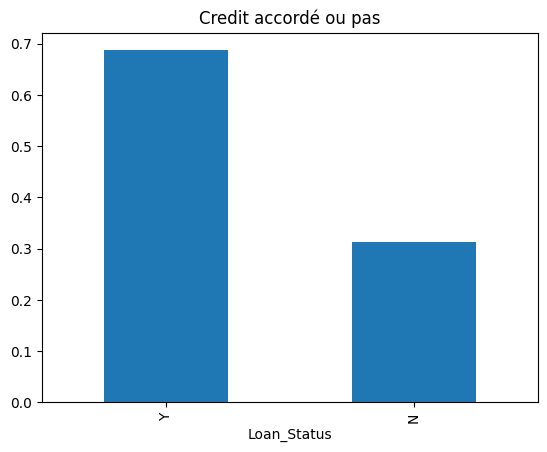

In [179]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Credit accordé ou pas')

In [180]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [181]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Comparaison des Sexes'}, xlabel='Gender'>

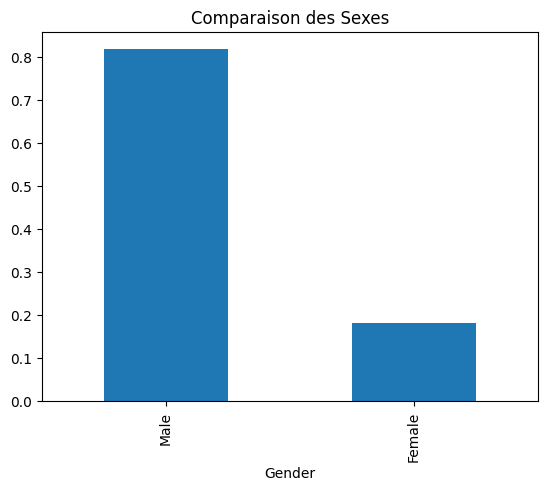

In [182]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Comparaison des Sexes')

<Axes: title={'center': 'Marié ou pas'}, xlabel='Married'>

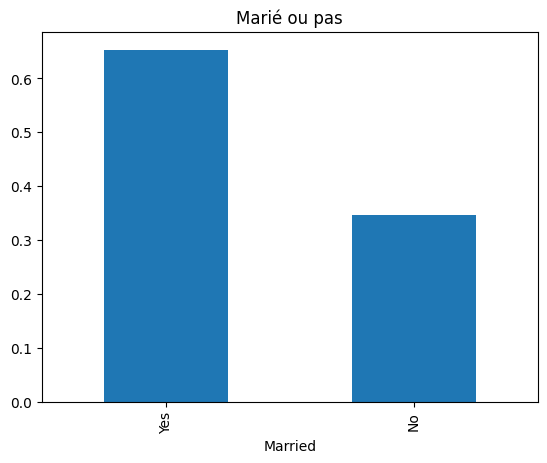

In [183]:
df['Married'].value_counts(normalize=True).plot.bar(title='Marié ou pas')

<Axes: title={'center': 'Self_Employed ou pas'}, xlabel='Self_Employed'>

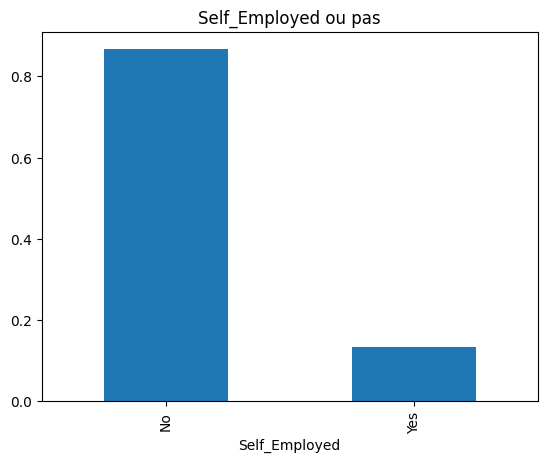

In [184]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed ou pas')

<Axes: title={'center': 'Credit_History ou pas'}, xlabel='Credit_History'>

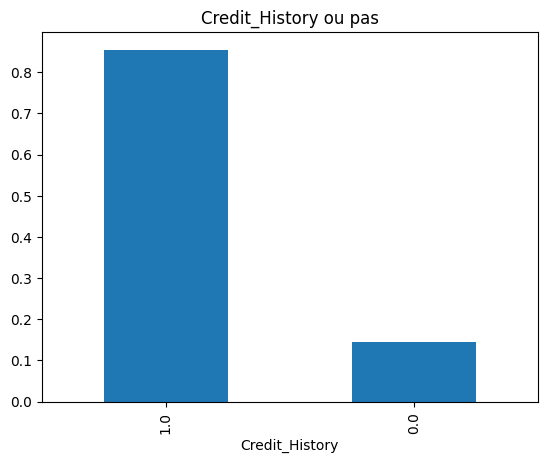

In [185]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History ou pas')

<Axes: title={'center': 'Nombre enfants'}, xlabel='Dependents'>

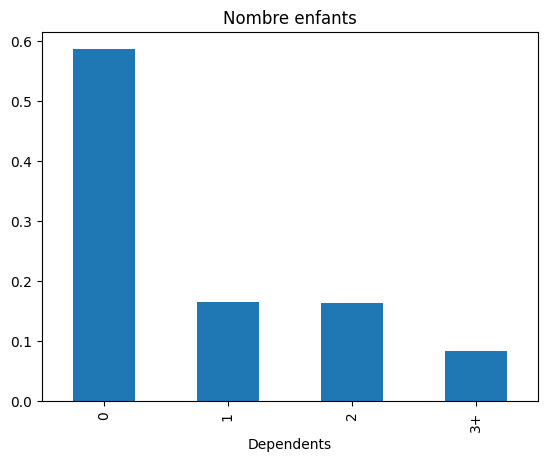

In [186]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Nombre enfants')

### 1.3) Les variables numériques :

In [187]:
df[var_num]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [188]:
#Pour afficher des valeurs statistiques :
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


### ApplicantIncome

C:\Users\dell\AppData\Local\Temp\ipykernel_14488\2819910301.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


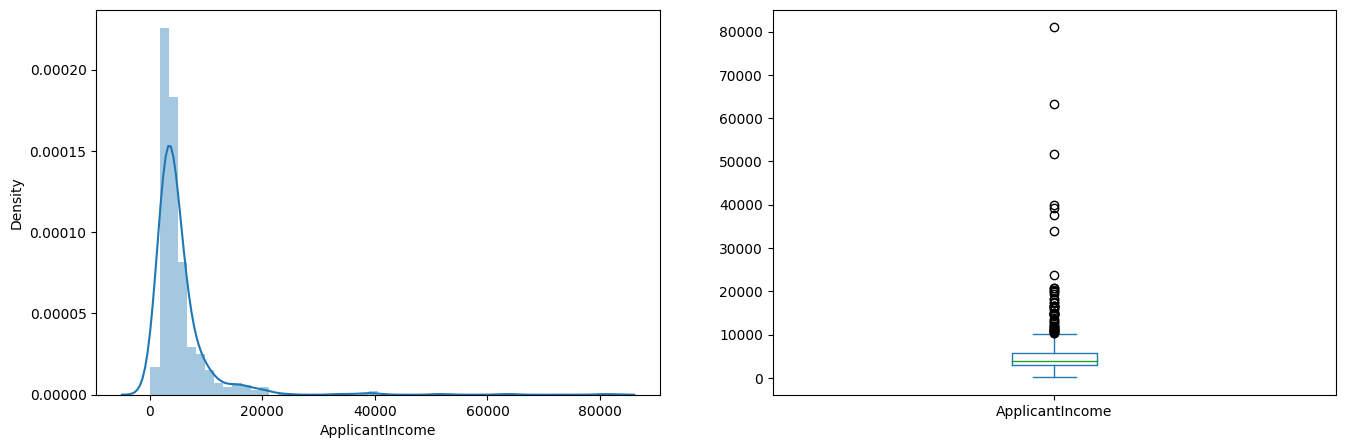

In [189]:

plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])


plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14488\2847046319.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


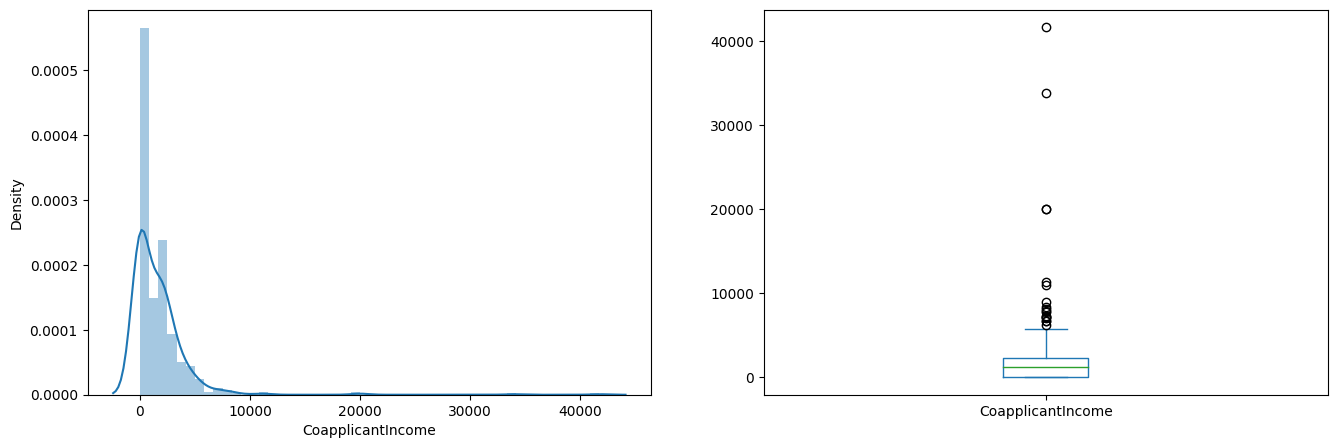

In [190]:

plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])


plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_14488\3726365737.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


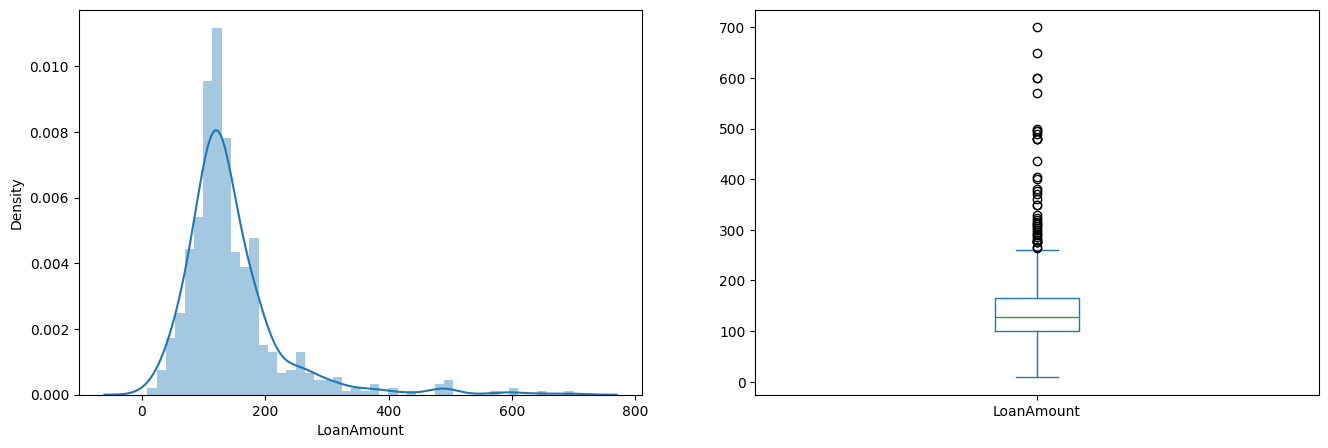

In [191]:

plt.figure(1)

plt.subplot(121)
sns.distplot(df['LoanAmount'])


plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14488\2535279533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'])


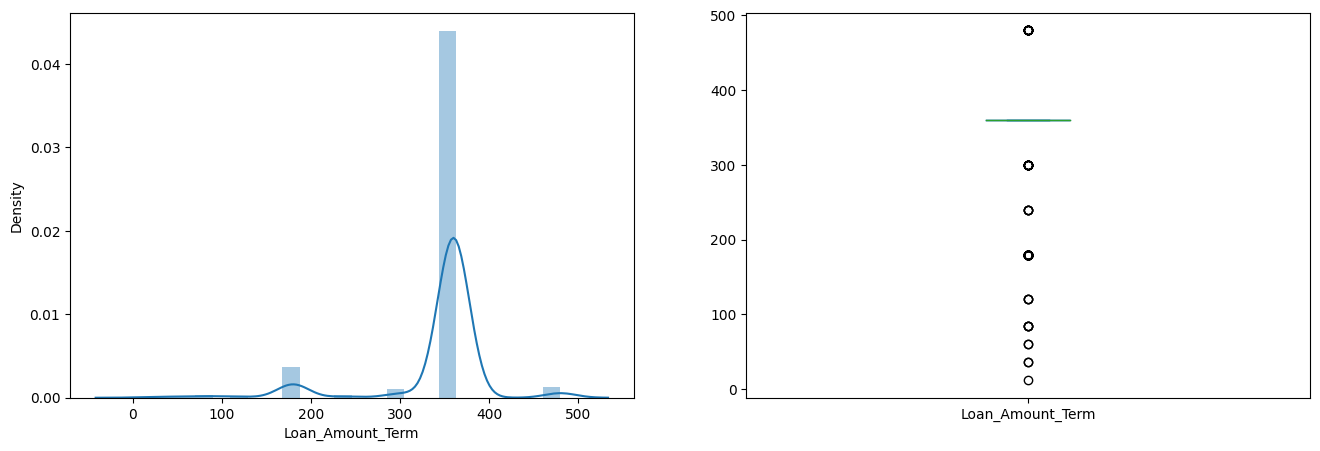

In [192]:

plt.figure(1)

plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])


plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

## 2) Analyse bivariée :

### Categorique :

#### - Voir la relation entre chaque variables categorique avec la variable target               'LoanStatus'

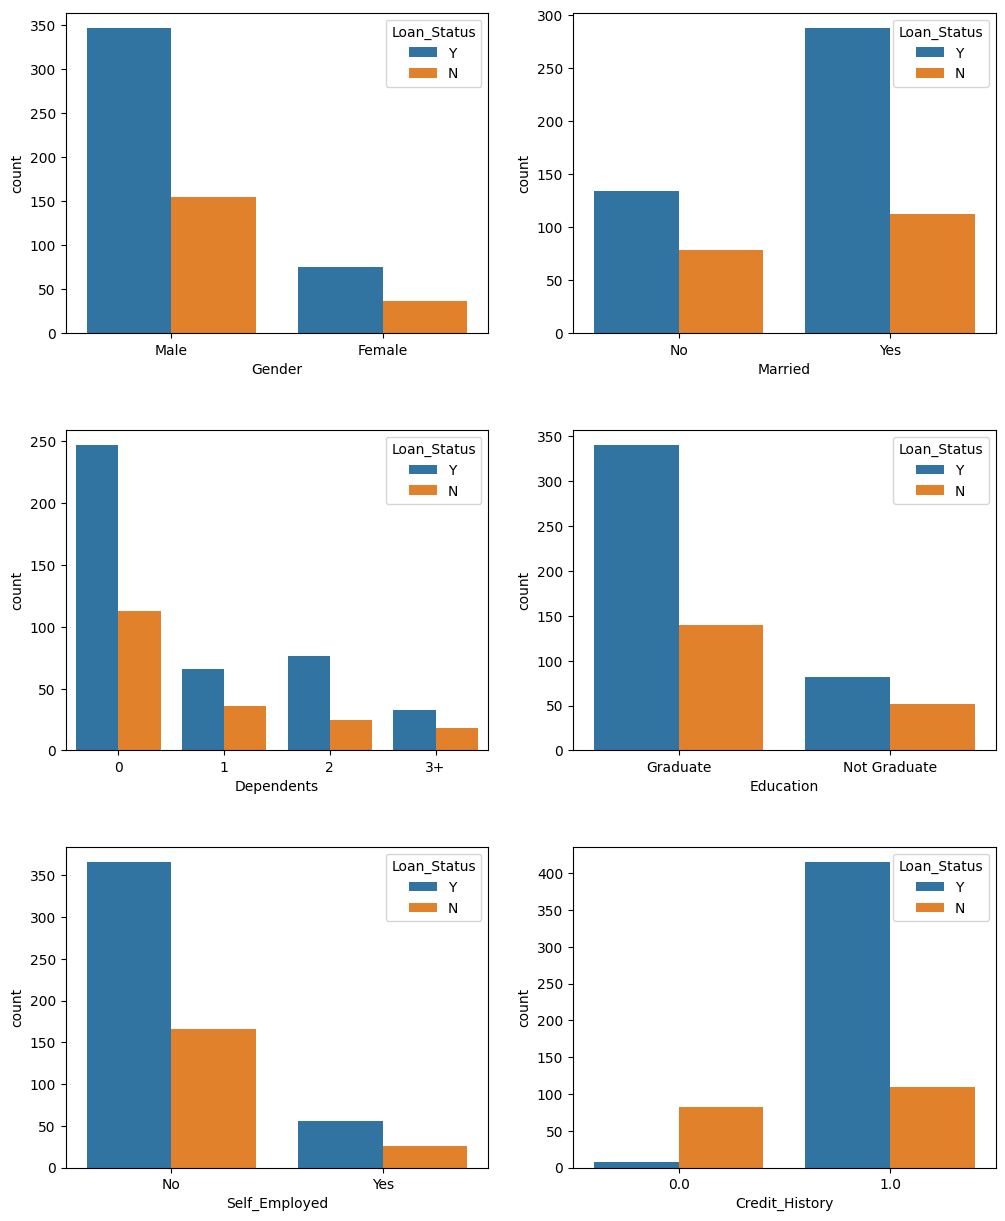

In [193]:
#les variables catégoriques
fig,axes=plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(var_cat[:-1]) : 
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
    plt.subplots_adjust(hspace=0.3)

### Correlation des variables numérique : 

#### - les relation entre les variables numériques 

In [194]:
df[var_num].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383
LoanAmount,0.565181,0.189218,1.000000,0.036960
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000


<Axes: >

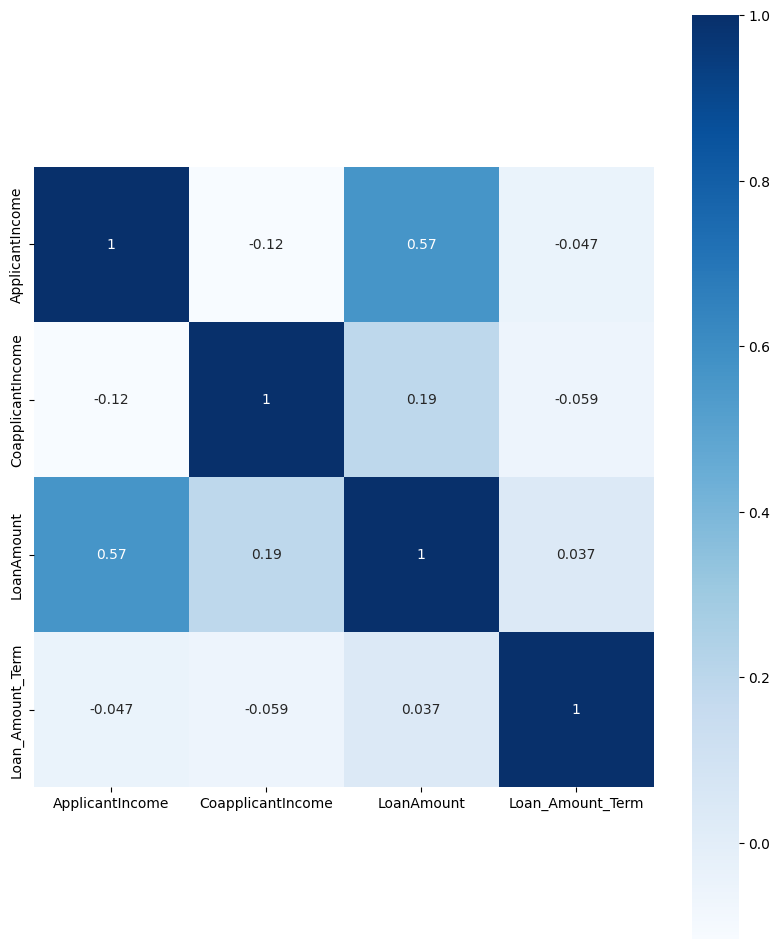

In [195]:

matrix=df[var_num].corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=1,square=True,cmap='Blues',annot=True)

# Création du modèle :

In [253]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,1.0,Y
1,Male,Yes,1,Graduate,No,1.0,N
2,Male,Yes,0,Graduate,Yes,1.0,Y
3,Male,Yes,0,Not Graduate,No,1.0,Y
4,Male,No,0,Graduate,No,1.0,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Y
610,Male,Yes,3+,Graduate,No,1.0,Y
611,Male,Yes,1,Graduate,No,1.0,Y
612,Male,Yes,2,Graduate,No,1.0,Y


In [254]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,1.0,True,False,False,False,False,False,False,True
1,1.0,True,True,True,False,False,False,False,False
2,1.0,True,True,False,False,False,False,True,True
3,1.0,True,True,False,False,False,True,False,True
4,1.0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
609,1.0,False,False,False,False,False,False,False,True
610,1.0,True,True,False,False,True,False,False,True
611,1.0,True,True,True,False,False,False,False,True
612,1.0,True,True,False,True,False,False,False,True


In [255]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [256]:
df_encoded=pd.concat([df_cat,df_num],axis=1)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,True,False,False,False,False,False,False,True,5849,0.0,128.0,360.0
1,1.0,True,True,True,False,False,False,False,False,4583,1508.0,128.0,360.0
2,1.0,True,True,False,False,False,False,True,True,3000,0.0,66.0,360.0
3,1.0,True,True,False,False,False,True,False,True,2583,2358.0,120.0,360.0
4,1.0,True,False,False,False,False,False,False,True,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,False,False,False,False,False,False,False,True,2900,0.0,71.0,360.0
610,1.0,True,True,False,False,True,False,False,True,4106,0.0,40.0,180.0
611,1.0,True,True,True,False,False,False,False,True,8072,240.0,253.0,360.0
612,1.0,True,True,False,True,False,False,False,True,7583,0.0,187.0,360.0


In [257]:
Y=df_encoded['Loan_Status_Y']
Y

0       True
1      False
2       True
3       True
4       True
       ...  
609     True
610     True
611     True
612     True
613    False
Name: Loan_Status_Y, Length: 614, dtype: bool

In [258]:
X=df_encoded.drop('Loan_Status_Y',axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,True,False,False,False,False,False,False,5849,0.0,128.0,360.0
1,1.0,True,True,True,False,False,False,False,4583,1508.0,128.0,360.0
2,1.0,True,True,False,False,False,False,True,3000,0.0,66.0,360.0
3,1.0,True,True,False,False,False,True,False,2583,2358.0,120.0,360.0
4,1.0,True,False,False,False,False,False,False,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,False,False,False,False,False,False,False,2900,0.0,71.0,360.0
610,1.0,True,True,False,False,True,False,False,4106,0.0,40.0,180.0
611,1.0,True,True,True,False,False,False,False,8072,240.0,253.0,360.0
612,1.0,True,True,False,True,False,False,False,7583,0.0,187.0,360.0


In [259]:
#Specifier la partie test et la partie train
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [260]:
#instancier le modele
clf= LogisticRegression(max_iter=1000)
#entrainer le modele
clf.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# tester le modele

In [261]:
feature_names = X.columns
clf.coef_ = pd.DataFrame(clf.coef_, columns=feature_names)
pred=clf.predict(x_test)

In [262]:
pred

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [263]:
y_test

387    False
266     True
292     True
392     True
332     True
       ...  
309     True
511     True
98      True
238     True
462     True
Name: Loan_Status_Y, Length: 123, dtype: bool

# Comparer notre modele avec y_test

In [264]:
accuracy_score(y_test,pred)

0.8373983739837398

In [265]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [266]:
#faire une prevision
profil_test=[[0,1,1,0,0,0,1,0,100,0,400,360],[0.0,True,True,False,False,False,True,False,3010,3136.0,128.0,360.0]]
clf.predict(profil_test)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False, False])

# Enregistrer le modele

In [267]:
pickle.dump(clf,open('prevision_credit.pkl','wb'))